# Gundam Example LRG

Example code to estimate a 2D projected correlation function using a sample of SDSS Luminous Red Galaxies.

In [1]:
from astropy.table import Table
from gundam import gundam as gun

In [2]:
# DEFINE PARAMETERS
galf = "../../tests/data/DR7-lrg.fits"  # Galaxy sample
ranf = "../../tests/data/DR7-lrg-rand.fits"  # Random sample
outfn = "../../tests/data/ex_LRG"  # Name for output files

In [3]:
par = gun.packpars(kind="pcf", file=galf, file1=ranf, outfn=outfn)
par.autogrid = False  # Automatic SK grid size
par.mxh1 = 60  # SK size in dec
par.mxh2 = 240  # SK size in ra
par.mxh3 = 24  # SK size in z
par.nsepp = 78  # Number of bins of projected separation rp
par.seppmin = 0.01  # Minimum rp in Mpc/h
par.dsepp = 0.5  # Bin size of rp (in log space)
par.logsepp = 0  # Use linear bins instead of log bins
par.nsepv = 60  # Number of bins of LOS separation pi
par.dsepv = 0.5  # Bin size of pi (in linear space)
par.doboot = True  # Do bootstrap error estimates
par.omegam = 0.25  # Omega matter
par.omegal = 0.75  # Omega lambda
par.h0 = 100  # Hubble constant [km/s/Mpc]
par.calcdist = True  # Calculate comov. dist.
par.estimator = "LS"  # Choose Landy-Szalay estimator for the PCF
par.description = "LumRedGxs"  # Description label

In [4]:
# READ DATA FILES
print("Reading file: ", galf)
gals = Table.read(galf)
if "wei" not in gals.colnames:
    gals["wei"] = 1.0  # If not present, set weights to 1

print("Reading file: ", ranf)
rans = Table.read(ranf)
if "wei" not in rans.colnames:
    rans["wei"] = 1.0  # If not present, set weights to 1

Reading file:  ../../tests/data/DR7-lrg.fits
Reading file:  ../../tests/data/DR7-lrg-rand.fits


In [5]:
# CALCULATE THE CORRELATION
nt = 4  # Threads to use
cnt = gun.pcf(gals, rans, par, nthreads=nt)

START!   06/07/24  15:08:48
Name of output set to : ../../tests/data/ex_LRG
Calling Information  ================================================
table        = ../../tests/data/DR7-lrg.fits
table_nrows  = 105831
table1       = ../../tests/data/DR7-lrg-rand.fits
table1_nrows = 832474
nthreads     = 4
write        = True
plot         = False
Comov_dist_tab compute time (s) : 1.974
Comov_dist_tab1 compute time (s) : 1.139
Sample boundaries : (0.00000, 360.00000, -11.24575, 70.27845, 464.68988, 1273.97723)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid                 : OFF
SK grid size [dec,ra,dcom]  : [60, 240, 24]
SK grid1 size [dec,ra,dcom] : [60, 240, 24]
Pixsort time (s)            : 0.385
SK-LL tables build time (s) : 0.026
====  Counting DD pairs in 60 DEC strips  =====
      [for progress updates check ../../tests/data/ex_LRG.fortran.log]
  
====  Counting DD pairs in  60 DEC strips  ====
   1  16  28  37   2   3   4   5   6  38  17   7  29   8  39  18 

/Users/scampos/gundam/src/gundam/gundam.py:1436: RuntimeWarning: invalid value encountered in log10
  logxi = np.log10(xi)


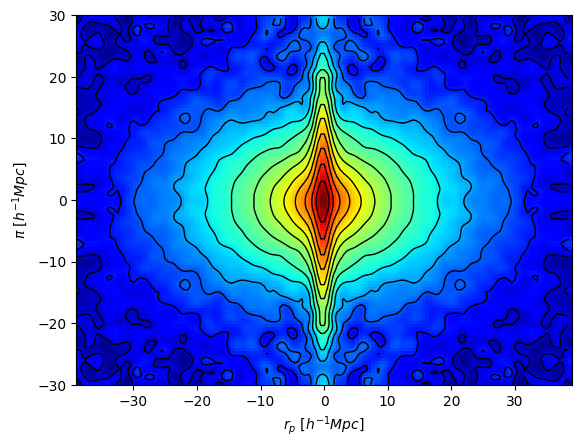

In [6]:
# NOW PLOT THE 2-DIMENSIONAL PCF
gun.cntplot2D(cnt, write=True)